# Visualizing categorical data

In seaborn, there are several different ways to visualize a relationship involving categorical data. Similar to the relationship between **```relplot()```** and either **```scatterplot()```** or **```lineplot()```**, there are two ways to make these plots. There are a number of axes-level functions for plotting categorical data in different ways and a figure-level interface, **```catplot()```**, that gives unified higher-level access to them.

It’s helpful to think of the different categorical plot kinds as belonging to three different families, which we’ll discuss in detail below. They are:

Categorical scatterplots:

- **```stripplot()```** (with ```kind="strip"```; the default)

- **```swarmplot()```** (with ```kind="swarm"```)

Categorical distribution plots:

- **```boxplot()```** (with ```kind="box"```)

- **```violinplot()```** (with ```kind="violin"```)

- **```boxenplot()```** (with ```kind="boxen"```)

Categorical estimate plots:

- **```pointplot()```** (with ```kind="point"```)

- **```barplot()```** (with ```kind="bar"```)

- **```countplot()```** (with ```kind="count"```)

These families represent the data using different levels of granularity. When deciding which to use, you’ll have to think about the question that you want to answer. The unified API makes it easy to switch between different kinds and see your data from several perspectives.

In this tutorial, we’ll mostly focus on the figure-level interface, **```catplot()```**. Remember that this function is a higher-level interface each of the functions above, so we’ll reference them when we show each kind of plot, keeping the more verbose kind-specific API documentation at hand.

In [1]:
import seaborn as sns

## Categorical scatterplots

The default representation of the data in **```catplot()```** uses a scatterplot. There are actually two different categorical scatter plots in seaborn. They take different approaches to resolving the main challenge in representing categorical data with a scatter plot, which is that all of the points belonging to one category would fall on the same position along the axis corresponding to the categorical variable. The approach used by **```stripplot()```**, which is the default “kind” in **```catplot()```** is to adjust the positions of points on the categorical axis with a small amount of random “jitter”:

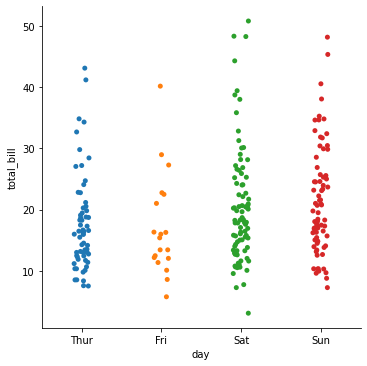

In [2]:
tips = sns.load_dataset("tips")
sns.catplot(data=tips, x="day", y="total_bill")

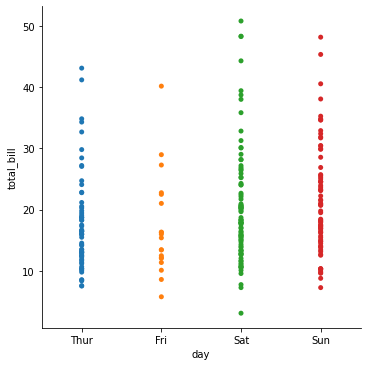

In [3]:
# The jitter parameter controls the magnitude of jitter or disables it altogether:

sns.catplot(data=tips, x="day", y="total_bill", jitter=False)

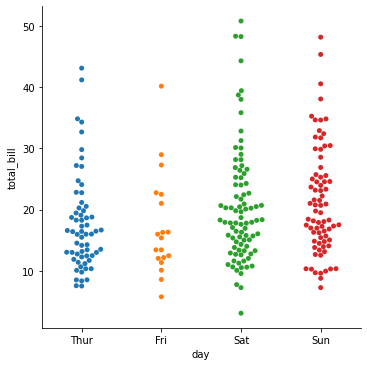

In [4]:
# Swarm plot
sns.catplot(data=tips, x="day", y="total_bill", kind="swarm")

Similar to the relational plots, it’s possible to add another dimension to a categorical plot by using a ```hue``` semantic. Each different categorical plotting function handles the ```hue``` semantic differently. For the scatter plots, it is only necessary to change the color of the points:

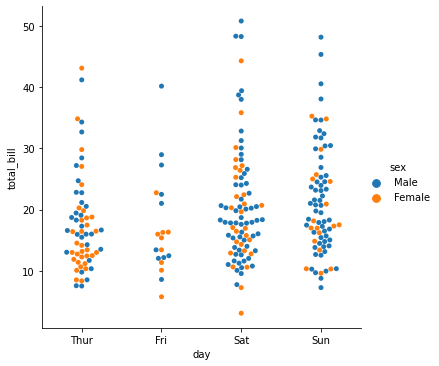

In [5]:
sns.catplot(data=tips, x="day", y="total_bill", hue="sex", kind="swarm")

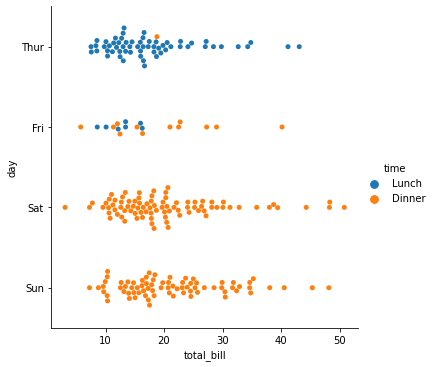

In [6]:
# swap the assignment of variables to axes

sns.catplot(data=tips, x="total_bill", y="day", hue="time", kind="swarm")

## Comparing distributions

As the size of the dataset grows, categorical scatter plots become limited in the information they can provide about the distribution of values within each category. When this happens, there are several approaches for summarizing the distributional information in ways that facilitate easy comparisons across the category levels.

### Boxplots

The first is the familiar **```oxplot()```**. This kind of plot shows the three quartile values of the distribution along with extreme values. The “whiskers” extend to points that lie within 1.5 IQRs of the lower and upper quartile, and then observations that fall outside this range are displayed independently. This means that each value in the boxplot corresponds to an actual observation in the data.

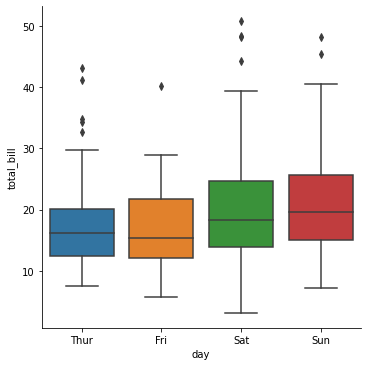

In [7]:
sns.catplot(data=tips, x="day", y="total_bill", kind="box")

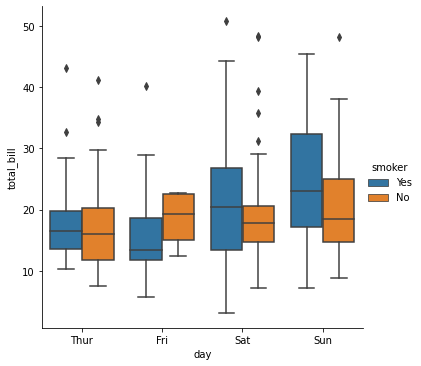

In [8]:
# Add hue
sns.catplot(data=tips, x="day", y="total_bill", hue="smoker", kind="box")

This behavior is called “dodging” and is turned on by default because it is assumed that the semantic variable is nested within the main categorical variable. If that’s not the case, you can disable the dodging:

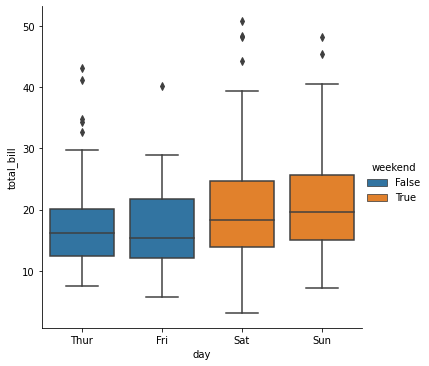

In [9]:
tips["weekend"] = tips["day"].isin(["Sat", "Sun"])
sns.catplot(
    data=tips, x="day", y="total_bill", hue="weekend",
    kind="box", dodge=False,
)

A related function, **```boxenplot()```**, draws a plot that is similar to a box plot but optimized for showing more information about the shape of the distribution. It is best suited for larger datasets:

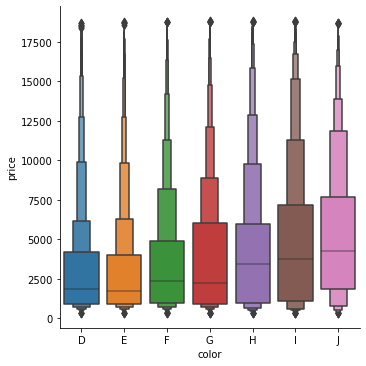

In [10]:
diamonds = sns.load_dataset("diamonds")
sns.catplot(data=diamonds.sort_values("color"), 
            x="color", y="price", kind="boxen")

### Violinplots

A different approach is a **```violinplot()```**, which combines a boxplot with the kernel density estimation procedure described in the distributions tutorial:

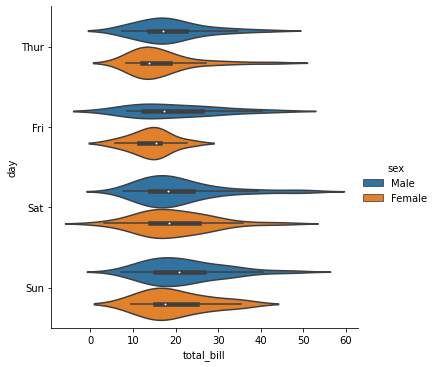

In [11]:
sns.catplot(data=tips, x="total_bill", y="day", hue="sex", kind="violin")

This approach uses the kernel density estimate to provide a richer description of the distribution of values. Additionally, the quartile and whisker values from the boxplot are shown inside the violin. The downside is that, because the violinplot uses a KDE, there are some other parameters that may need tweaking, adding some complexity relative to the straightforward boxplot:

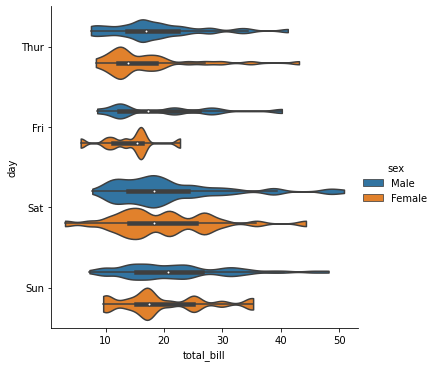

In [12]:
sns.catplot(
    data=tips, x="total_bill", y="day", hue="sex",
    kind="violin", bw=.15, cut=0,
)

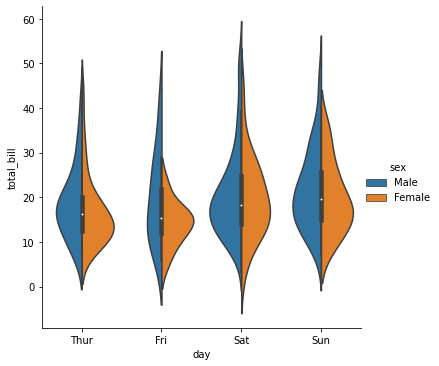

In [13]:
# split when hue has only two levels

sns.catplot(data=tips, x="day", y="total_bill", hue="sex",
            kind="violin", split=True)

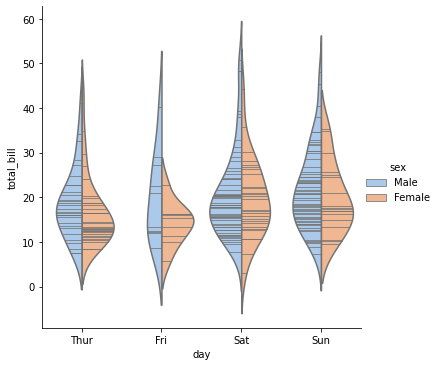

In [14]:
# draw interior of the violins

sns.catplot(data=tips, x="day", y="total_bill", hue="sex",
            kind="violin", inner="stick", split=True, palette="pastel")

<AxesSubplot:xlabel='day', ylabel='total_bill'>

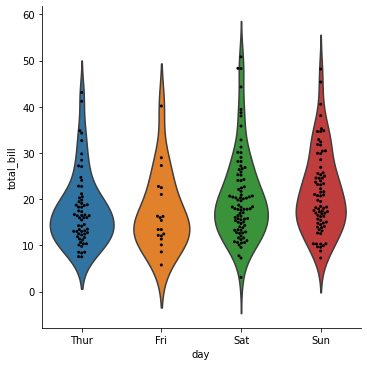

In [15]:
# Combine with swarmplot()
g = sns.catplot(data=tips, x="day", y="total_bill", kind="violin", inner=None)
sns.swarmplot(data=tips, x="day", y="total_bill", color="k", size=3, ax=g.ax)

## Estimating central tendency

For other applications, rather than showing the distribution within each category, you might want to show an estimate of the central tendency of the values. Seaborn has two main ways to show this information. Importantly, the basic API for these functions is identical to that for the ones discussed above.

### Bar plots

A familiar style of plot that accomplishes this goal is a bar plot. In seaborn, the **```barplot()```** function operates on a full dataset and applies a function to obtain the estimate (taking the mean by default). When there are multiple observations in each category, it also uses bootstrapping to compute a confidence interval around the estimate, which is plotted using error bars:

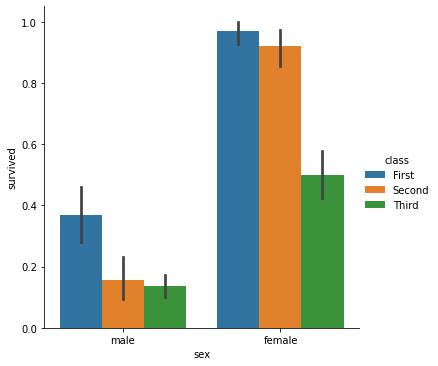

In [16]:
titanic = sns.load_dataset("titanic")
sns.catplot(data=titanic, x="sex", y="survived", hue="class", kind="bar")

A special case for the bar plot is when you want to show the number of observations in each category rather than computing a statistic for a second variable. This is similar to a histogram over a categorical, rather than quantitative, variable. In seaborn, it’s easy to do so with the **```countplot()```** function:

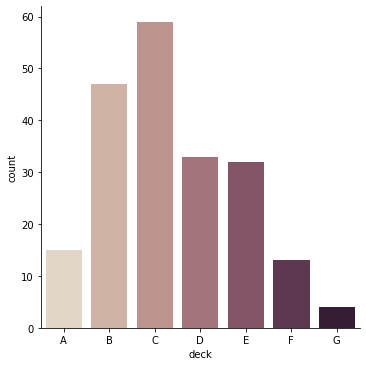

In [17]:
sns.catplot(data=titanic, x="deck", kind="count", palette="ch:.25")

### Point plots

An alternative style for visualizing the same information is offered by the **```pointplot()```** function. This function also encodes the value of the estimate with height on the other axis, but rather than showing a full bar, it plots the point estimate and confidence interval. Additionally, **```pointplot()```** connects points from the same ```hue``` category. This makes it easy to see how the main relationship is changing as a function of the hue semantic, because your eyes are quite good at picking up on differences of slopes:

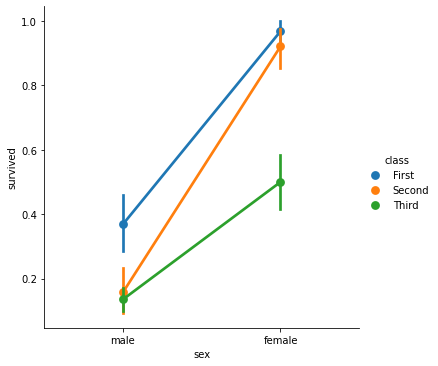

In [18]:
sns.catplot(data=titanic, x="sex", y="survived", hue="class", kind="point")

While the categorical functions lack the ```style``` semantic of the relational functions, it can still be a good idea to vary the marker and/or linestyle along with the hue to make figures that are maximally accessible and reproduce well in black and white:

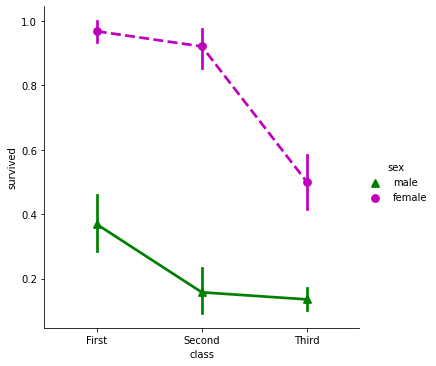

In [19]:
sns.catplot(
    data=titanic, x="class", y="survived", hue="sex",
    palette={"male": "g", "female": "m"},
    markers=["^", "o"], linestyles=["-", "--"],
    kind="point"
)

## Showing additional dimensions

Just like **```relplot()```**, the fact that **```catplot()```** is built on a **```FacetGrid```** means that it is easy to add faceting variables to visualize higher-dimensional relationships:

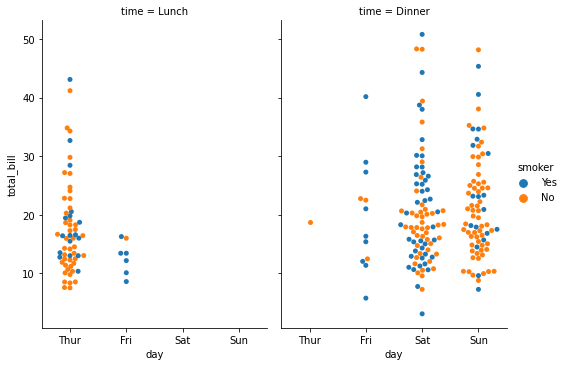

In [20]:
sns.catplot(
    data=tips, x="day", y="total_bill", hue="smoker",
    kind="swarm", col="time", aspect=.7,
)

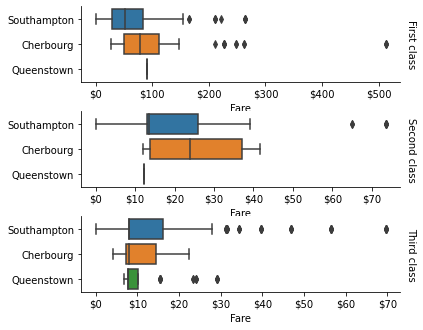

In [21]:
g = sns.catplot(
    data=titanic,
    x="fare", y="embark_town", row="class",
    kind="box", orient="h",
    sharex=False, margin_titles=True,
    height=1.5, aspect=4,
)
g.set(xlabel="Fare", ylabel="")
g.set_titles(row_template="{row_name} class")
for ax in g.axes.flat:
    ax.xaxis.set_major_formatter('${x:.0f}')